# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

[5 pts]

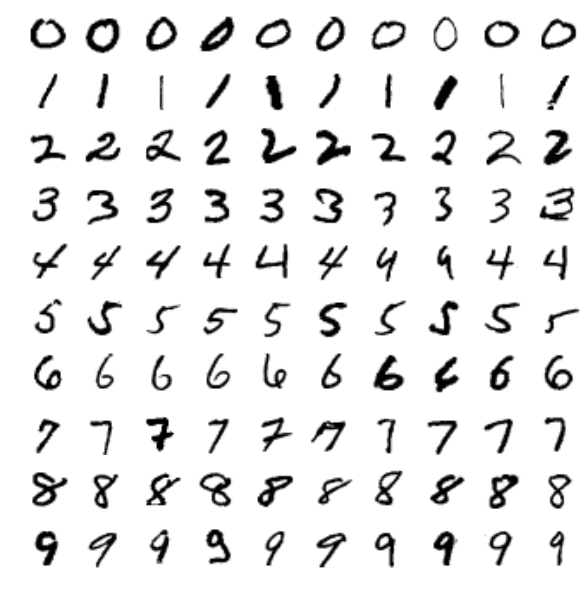

In [4]:
def P1(num_examples=10):

### STUDENT START ###

    #Find examples for each digit 0-10. We want num_examples different examples
    #We will take the first num_examples examples for each digit. Our strategy is to
    #loop over the labels, creating a 2D array of the indexes for each example.
    examples_found, i = 0, 0
    example_matrix = [[] for x in xrange(10)]
    while examples_found < 10 * num_examples:
        this_label = int(mini_train_labels[i])
        if len(example_matrix[this_label]) < num_examples:
            example_matrix[this_label].append(i)
            examples_found += 1
        i += 1
                
    #Reshape the data for plotting
    train_data_shaped = np.reshape(mini_train_data, (len(mini_train_data), 28,-1))

    #Set up the plot
    plt.figure(figsize=(10, 10))
    i = 1
    
    #We iterate through the examples we found, and use the indexes we stored to plot in the
    #correct order. We use two for loops to properly place everything.
    for x in range(0, 10):
        for y in range(0, num_examples):
            plt.subplot(10,num_examples,i), plt.imshow(train_data_shaped[example_matrix[x][y]], cmap=plt.cm.binary)
            plt.axis('off')
            i += 1


### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

[3 pts]

Model k = 1
accuracy of predictions: 0.888

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Model k = 3
accuracy of predictions: 0.878

Model k = 5
accuracy of predictions: 0.869

Model k = 7
accuracy of predictions: 0.865

Model k = 9
accuracy of predictions: 0.863



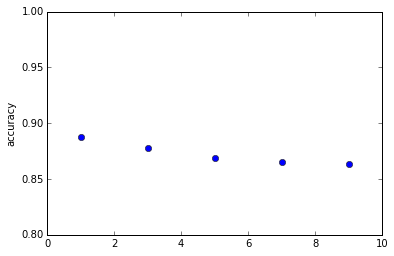

In [5]:
def P2(k_values):

### STUDENT START ###

    # list to store results
    accuracy = []
    
    # loop through different k here
    for k in k_values:
        # train model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        train_predicted_labels = model.predict(dev_data)
    
        # we calculate accuracy manually here to help learn. future code will use the "scores" function
        print 'Model k =', k
        prediction_count = len(train_predicted_labels)
        wrong_prediction = np.sum(train_predicted_labels != dev_labels)
        correct_prediction = prediction_count - wrong_prediction
        print 'accuracy of predictions:', float(correct_prediction) / len(train_predicted_labels)
        print 
        
        # store accuracy
        accuracy.append(float(correct_prediction) / len(train_predicted_labels))

        # only print the classification_report when k == 1
        if k == 1:
            print classification_report(dev_labels, train_predicted_labels)

    # let's show accuracy visually for fun
    plt.plot(k_values, accuracy, 'bo')
    plt.ylabel('accuracy')
    plt.axis([0, 10, 0.8, 1])

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

ANSWER: In this case, higher k seems to have more incorrect predictions (see graph). Checking more nearby neighbors seems to actually be confusing our prediction abilities.

For k == 1, we see that the digit 9 is the most difficult digit, with the lowest f1-score (0.80), the second lowest recall score (0.82), and the second-lowest precision score (0.78). While the digit 2 has a lower recall score and the digit 3 has a lower precision score, the digit 9 is bad on both precision and recall, leading to the lower f1-score.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

[2 pts]

accuracy with size 100: 0.72    time (sec) for size 100: 0.11
accuracy with size 200: 0.786    time (sec) for size 200: 0.23
accuracy with size 400: 0.841    time (sec) for size 400: 0.46
accuracy with size 800: 0.884    time (sec) for size 800: 0.96
accuracy with size 1600: 0.902    time (sec) for size 1600: 2.1
accuracy with size 3200: 0.926    time (sec) for size 3200: 4.48
accuracy with size 6400: 0.937    time (sec) for size 6400: 8.92
accuracy with size 12800: 0.959    time (sec) for size 12800: 18.49
accuracy with size 25000: 0.97    time (sec) for size 25000: 38.68


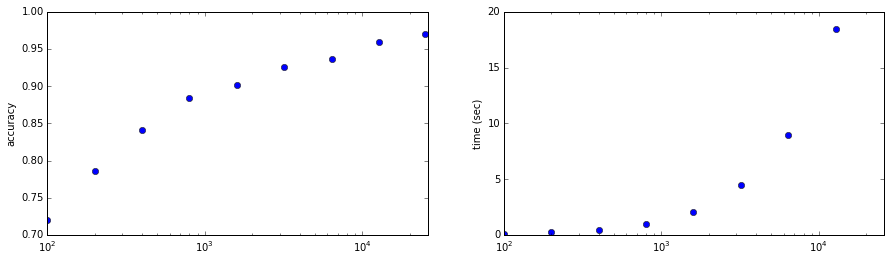

In [6]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    times = []
    # iterate thru sizes
    for size in train_sizes:
        # time and fit model, then store time
        start_time = time.time()
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data[:size], train_labels[:size])
        train_predicted_labels = model.predict(dev_data)
        total_time = time.time() - start_time
        times.append(total_time)
        
        # calculate accuracy (here, manually)
        correct_answers = np.sum(train_predicted_labels == dev_labels)
        accuracy = float(correct_answers) / len(train_predicted_labels)
        accuracies.append(accuracy)        
        print "accuracy with size {0}: {1}    time (sec) for size {0}: {2}".format(size, accuracy, round(total_time,2))
        

    # let's show accuracy visually for fun
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes, accuracies, 'bo')
    plt.ylabel('accuracy')
    plt.xscale('log')
    plt.axis([0, 26000, 0.7, 1])
    #plt.show() 
    
    # let's also show the timing visually
    plt.subplot(1, 2, 2)
    plt.plot(train_sizes, times, 'bo')
    plt.ylabel('time (sec)')
    plt.xscale('log')
    plt.axis([0, 26000, 0, 20])
    plt.show()


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

[3 pts]

Linear Regression
Coefficient: 0.00000667
Residual sum of squares: 0.0035
R^2 score: 0.44
Predicted accuracy for N = 60,000: 1.24

Log Transformed Regression
Coefficient: 0.09732856
Residual sum of squares: 0.0005
R^2 score: 0.91
Predicted accuracy for N = 60,000: 1.03


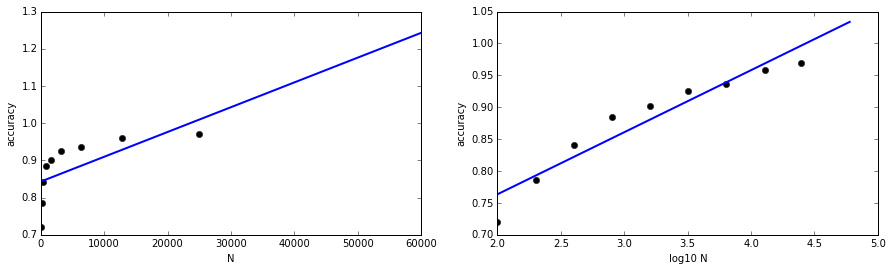

In [8]:
def P4():

### STUDENT START ###
    # Prepare arrays to use sklearn's LinearRegression
    np_train = np.array(train_sizes)
    np_train_matrix = np.reshape(np_train, (len(np_train), 1))
    np_accuracies = np.array(accuracies)
    
    # Run Regression
    model = LinearRegression()
    model.fit(np_train_matrix, np_accuracies)
    print 'Linear Regression'
    print 'Coefficient: %.8f' % model.coef_[0]
    print 'Residual sum of squares: %.4f' % np.mean((model.predict(np_train_matrix) - np_accuracies) ** 2)
    print 'R^2 score: %.2f' % model.score(np_train_matrix, np_accuracies)
    print 'Predicted accuracy for N = 60,000: %.2f' % model.predict([[60000]])[0]
    print
    
    # Resullts indicate a log transform may be a better fit
    model_trans = LinearRegression()
    np_train_matrix_trans = np.log10(np_train_matrix)
    model_trans.fit(np_train_matrix_trans, np_accuracies)
    print 'Log Transformed Regression'
    print 'Coefficient: %.8f' % model_trans.coef_[0]
    print 'Residual sum of squares: %.4f' % np.mean((model_trans.predict(np_train_matrix_trans) - np_accuracies) ** 2)
    print 'R^2 score: %.2f' % model_trans.score(np_train_matrix_trans, np_accuracies)
    print 'Predicted accuracy for N = 60,000: %.2f' % model_trans.predict(np.log10([[60000]]))[0]
    
    plt.figure(figsize=(15, 4))
    # Plot Linear
    plt.subplot(1, 2, 1)
    plt.plot(np_train_matrix, np_accuracies, 'ok')
    plt.plot([[0],[60000]], model.predict([[0],[60000]]), color='blue', linewidth=2)
    plt.ylabel('accuracy')
    plt.xlabel('N')

    # Plot Transformed
    plt.subplot(1, 2, 2)
    plt.plot(np_train_matrix_trans, np_accuracies, 'ok')
    plt.plot(np.log10([[100],[60000]]), model_trans.predict(np.log10([[100],[60000]])), color='blue', linewidth=2)
    plt.ylabel('accuracy')
    plt.xlabel('log10 N')
    
### STUDENT END ###

P4()

ANSWER: For N = 60000, the linear model predicts accuracy of 1.23. This is not reasonable, partcially because it is impossible to have accuracy over 1.0. Even if our accuracy was 1.0, it would not be reasonable because it seems highly improbably to perfectly predict results using k-nearest-neighbors. The real world just has too much noise to get it right 100% of the time.

We can make this better (though not perfect) by log transforming the data. When we do, we predict accuracy of 1.03 for N = 60000. This is still an impossible value (> 100% accuracy), but since it is better it answers the question we were asked.

At a higher level: it is generally inappropriate to use regression methods to predict results outside the range of inputs to the regression. The largest input to the regression is N = 25000, which is less than half of the number we are attempting to estimate.

Fit a 1-NN and output a confusion matrix for the dev data. For each of the top 5 confused pairs, display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[4 pts]

Confusion matrix: 
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

Top 5 confused (count, act, pred): [(14, 4, 9), (9, 5, 3), (9, 9, 4), (5, 8, 3), (5, 9, 7)]

Actually 4, predicted 9:


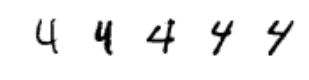

Actually 5, predicted 3:


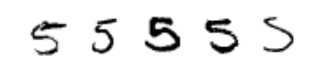

Actually 9, predicted 4:


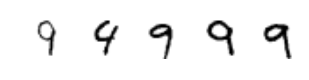

Actually 8, predicted 3:


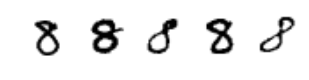

Actually 9, predicted 7:


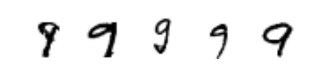

In [11]:
def P5():

### STUDENT START ###
    # Note - this problem looks a lot nicer when using the full training data. The prompt requested we
    # use the mini dataset unless told otherwise, so I have switched back to the mini dataset for the
    # final submission.
    
    # First, fit the 1-NN model
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    trian_predicted_labels = model.predict(dev_data)

    # Next, build the confusion matrix
    cm = confusion_matrix(dev_labels, trian_predicted_labels)
    print 'Confusion matrix: \n', cm
    
    # Now, we need to find the top 5 confused pairs. I'm going to do this with a loop
    #    but I'd love to hear a better way to do this if you have suggested code.
    confusion_tup = []
    for row in range(0,len(cm)):
        for col in range(0,len(cm)):
            if row != col:
                confusion_tup.append( (cm[row][col],row,col) )

    top_confused = sorted(confusion_tup,key=lambda x: x[0], reverse=True)[:5]
    print
    print 'Top 5 confused (count, act, pred):', top_confused
    print 
    
    # Now, we iterate through the most confused tuples and print mistake examples.
    #   The problem said we only need a few examples. I will plot a max of 5 examples.
    for tup in top_confused:
        # Get up to 5 examples
        example_data = dev_data[(dev_labels == tup[1]) & (trian_predicted_labels == tup[2])][:5]
        plt.figure(figsize=(len(example_data), 2))

        # Shape examples for rendering
        train_data_shaped = np.reshape(example_data, (len(example_data), 28,-1))

        # Render examples
        i = 1
        for x in range(0, len(example_data)):
            plt.subplot(1,len(example_data),i), plt.imshow(train_data_shaped[x], cmap=plt.cm.binary)
            plt.axis('off')
            i += 1
        print 'Actually %d, predicted %d:' % (tup[1], tup[2])
        plt.show()

    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

[4 pts]

Processing sigma: 0
Processing sigma: 1
Processing sigma: 5
Processing sigma: 10
Sigmas Evaluated: ['0.00', '1.00', '5.00', '10.00']
Accuracy Blur Train: ['0.89', '0.91', '0.91', '0.91']
Accuracy Blur Dev: ['0.89', '0.88', '0.87', '0.87']
Accuracy Blur Both: ['0.89', '0.90', '0.90', '0.90']


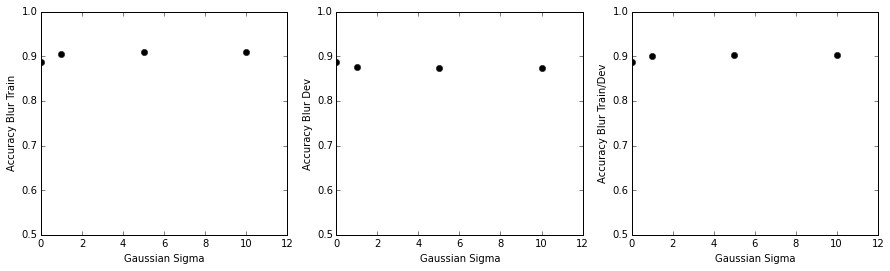

Processing width: 1
Processing width: 3
Processing width: 5
Processing width: 7
Processing width: 9
Processing width: 11
Sigmas Evaluated: ['0.00', '1.00', '5.00', '10.00']
Accuracy Blur Train: ['0.89', '0.91', '0.91', '0.91', '0.91', '0.91']
Accuracy Blur Dev: ['0.89', '0.88', '0.86', '0.86', '0.86', '0.86']
Accuracy Blur Both: ['0.89', '0.90', '0.90', '0.90', '0.90', '0.90']


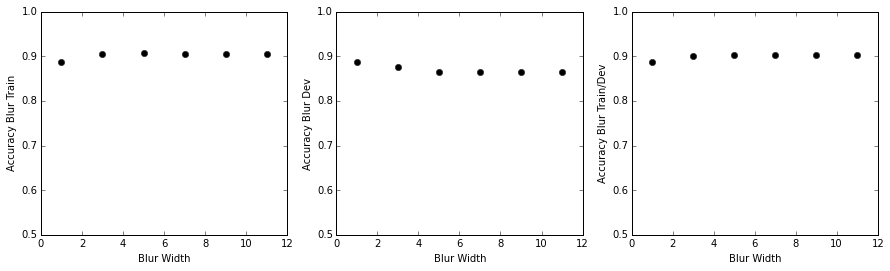

In [20]:
# Note - the problem welcomes us to import ndimage, so I have decided to do so. I hope this does not
# violate the request not to add packages since this specific package was called out as appropriate.
# I will use ndimage to implement the blur as described in the problem.

from scipy import ndimage
def P6():
    
### STUDENT START ###
    # when using the scipy ndimage gaussian filter, the truncate option and sigma option 
    # interact the function below lets us define a width and sigma, and gives us a truncate. 
    # this lets us keep the width to 3 (as suggested in the prompt) while trying different 
    # sigmas
    def get_truncate(width, sigma):
        #width = 2*int(truncate*sigma + 0.5) + 1
        truncate = (((width - 1) / 2) - 0.5)/sigma
        #print 'Truncate:', truncate
        #print 'Width:', 2*int(truncate*sigma + 0.5) + 1
        return truncate
    
    # Function to apply a blur. Note we can define the width (prompt suggested w=3), and
    # sigma for the gaussian function
    def blur_data(data, width, sigma):
        data_blur = np.zeros((len(data),28,28))
        for x in range(0, len(data)):
            data_blur[x] = ndimage.filters.gaussian_filter(data[x], sigma, truncate=get_truncate(width,sigma))
        return data_blur
    
    #shape data into 28x28 form for blurring (needs 2D setup)
    train_data_shaped = np.reshape(mini_train_data, (len(mini_train_data), 28,-1))
    dev_data_shaped = np.reshape(dev_data, (len(dev_data), 28,-1))
    
    accuracy_btrain = []
    accuracy_bdev = []
    accuracy_bboth = []
    sigma_list = [0, 1, 5, 10]
    width = 3

    for sigma in sigma_list:
        # Use sigma = 0 as a code to not blur the data.
        print "Processing sigma:", sigma
        if sigma == 0:
            train_blur = mini_train_data
            dev_blur = dev_data
        else:
            # preprocess the training data
            train_blur_shaped = blur_data(train_data_shaped, width, sigma)
            train_blur = np.reshape(train_blur_shaped, (len(train_blur_shaped), -1))
            # preprocess the dev data
            dev_blur_shaped = blur_data(dev_data_shaped, width, sigma)
            dev_blur = np.reshape(dev_blur_shaped, (len(dev_blur_shaped), -1))
        
        # KNN
        # blur train only
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_blur, mini_train_labels)
        predicted_labels = model.predict(dev_data)
        accuracy_btrain.append(np.mean(predicted_labels == dev_labels))
        # blur train only
        model.fit(mini_train_data, mini_train_labels)
        predicted_labels = model.predict(dev_blur)
        accuracy_bdev.append(np.mean(predicted_labels == dev_labels))
        # blur both
        model.fit(train_blur, mini_train_labels)
        predicted_labels = model.predict(dev_blur)
        accuracy_bboth.append(np.mean(predicted_labels == dev_labels))        
        
    print 'Sigmas Evaluated:', ['%.2f' % elem for elem in sigma_list]
    print 'Accuracy Blur Train:', ['%.2f' % elem for elem in accuracy_btrain]
    print 'Accuracy Blur Dev:', ['%.2f' % elem for elem in accuracy_bdev]
    print 'Accuracy Blur Both:', ['%.2f' % elem for elem in accuracy_bboth]
    
    plt.figure(figsize=(15, 4))
    # Plot Linear
    plt.subplot(1, 3, 1)
    plt.plot(sigma_list, accuracy_btrain, 'ok')
    plt.ylabel('Accuracy Blur Train')
    plt.xlabel('Gaussian Sigma')
    plt.axis([0, 12, 0.5, 1])

    plt.subplot(1, 3, 2)
    plt.plot(sigma_list, accuracy_bdev, 'ok')
    plt.ylabel('Accuracy Blur Dev')
    plt.xlabel('Gaussian Sigma')
    plt.axis([0, 12, 0.5, 1])

    plt.subplot(1, 3, 3)
    plt.plot(sigma_list, accuracy_bboth, 'ok')
    plt.ylabel('Accuracy Blur Train/Dev')
    plt.xlabel('Gaussian Sigma')
    plt.axis([0, 12, 0.5, 1])
    plt.show()

    # Now, for fun, let's modify the width
    accuracy_btrain = []
    accuracy_bdev = []
    accuracy_bboth = []
    sigma = 1
    width_list = [1, 3, 5, 7, 9, 11]

    for width in width_list:
        # Use width = 1 as a code to not blur the data.
        print "Processing width:", width
        if width == 1:
            train_blur = mini_train_data
            dev_blur = dev_data
        else:
            # preprocess the training data
            train_blur_shaped = blur_data(train_data_shaped, width, sigma)
            train_blur = np.reshape(train_blur_shaped, (len(train_blur_shaped), -1))
            # preprocess the dev data
            dev_blur_shaped = blur_data(dev_data_shaped, width, sigma)
            dev_blur = np.reshape(dev_blur_shaped, (len(dev_blur_shaped), -1))
        
        # KNN
        # blur train only
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_blur, mini_train_labels)
        predicted_labels = model.predict(dev_data)
        accuracy_btrain.append(np.mean(predicted_labels == dev_labels))
        # blur train only
        model.fit(mini_train_data, mini_train_labels)
        predicted_labels = model.predict(dev_blur)
        accuracy_bdev.append(np.mean(predicted_labels == dev_labels))
        # blur both
        model.fit(train_blur, mini_train_labels)
        predicted_labels = model.predict(dev_blur)
        accuracy_bboth.append(np.mean(predicted_labels == dev_labels))        
        
    print 'Sigmas Evaluated:', ['%.2f' % elem for elem in sigma_list]
    print 'Accuracy Blur Train:', ['%.2f' % elem for elem in accuracy_btrain]
    print 'Accuracy Blur Dev:', ['%.2f' % elem for elem in accuracy_bdev]
    print 'Accuracy Blur Both:', ['%.2f' % elem for elem in accuracy_bboth]
    
    plt.figure(figsize=(15, 4))
    # Plot Linear
    plt.subplot(1, 3, 1)
    plt.plot(width_list, accuracy_btrain, 'ok')
    plt.ylabel('Accuracy Blur Train')
    plt.xlabel('Blur Width')
    plt.axis([0, 12, 0.5, 1])

    plt.subplot(1, 3, 2)
    plt.plot(width_list, accuracy_bdev, 'ok')
    plt.ylabel('Accuracy Blur Dev')
    plt.xlabel('Blur Width')
    plt.axis([0, 12, 0.5, 1])

    plt.subplot(1, 3, 3)
    plt.plot(width_list, accuracy_bboth, 'ok')
    plt.ylabel('Accuracy Blur Train/Dev')
    plt.xlabel('Blur Width')
    plt.axis([0, 12, 0.5, 1])
    plt.show()
    
### STUDENT END ###

P6()

ANSWER: My results found that blurring the training data, but not the dev data, leads to the best results. Blurring the dev data without blurring the training data actually decreases accuracy. I don't find this surprising, since blurring the dev data alone makes it more unlike the training data we are using. Blurring the training data alone also  seems better than blurring both. I suspect this is because the blur allows our small mini_train set to represent a wider variety of training examples (by increasing the edges), while blurring the dev set just adds noise.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

[4 pts]

In [21]:
def P7():

### STUDENT START ###
    #Binary
    binarized_train_data = np.ceil(mini_train_data)
    binarized_dev_data = np.ceil(dev_data)
    
    binaryNB = BernoulliNB()
    binaryNB.fit(binarized_train_data, mini_train_labels)
    print 'BernoulliNB accuracy: %3.2f' %binaryNB.score(binarized_dev_data, dev_labels)

    #Ternary
    def ternarize(data, black_threshold):        
        temp = data.copy()
        temp[temp >= black_threshold] = 2
        temp[np.logical_and(temp>0, temp<black_threshold)] = 1
        return temp
    
    ternarized_train_data = ternarize(mini_train_data, 1)
    ternarized_dev_data = ternarize(dev_data, 1)
    
    ternaryNB = MultinomialNB()
    ternaryNB.fit(ternarized_train_data, mini_train_labels)
    print 'MultinomialNB accuracy: %3.2f' %ternaryNB.score(ternarized_dev_data, dev_labels)
    

    
### STUDENT END ###

P7()

BernoulliNB accuracy: 0.81
MultinomialNB accuracy: 0.79


ANSWER: The multi-class version does not improve the results. My interpretation is that having fewer possible feature values actually gives us more classification power in this context. Perhaps we are dilluting the predictive capabilities by splitting pixels apart into "white", "gray" and "black", so we don't gain much additional information by parsing this out.

This demonstrates the value of good "feature engineers". Ideas that sound good on paper (like multi-class) might not actually help

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter). What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

[3 pts]

0.092 (+/-0.000) for {'alpha': 0.0}
0.820 (+/-0.011) for {'alpha': 0.0001}
0.820 (+/-0.012) for {'alpha': 0.001}
0.820 (+/-0.013) for {'alpha': 0.01}
0.821 (+/-0.012) for {'alpha': 0.1}
0.819 (+/-0.011) for {'alpha': 0.5}
0.812 (+/-0.009) for {'alpha': 1.0}
0.810 (+/-0.009) for {'alpha': 2.0}
0.775 (+/-0.009) for {'alpha': 10.0}


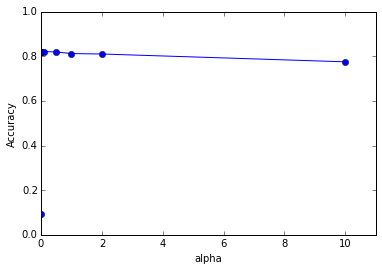

Best alpha value: {'alpha': 0.1}


In [28]:
def P8(alphas):

### STUDENT START ###
    binarized_train_data = np.ceil(mini_train_data)

    NBGridSearch = GridSearchCV(BernoulliNB(), alphas, scoring='accuracy')
    NBGridSearch.fit(binarized_train_data, mini_train_labels)
    
    # Report out on the accuracies
    for params, mean_score, scores in NBGridSearch.grid_scores_:
        print "%0.3f (+/-%0.03f) for %r" % (
            mean_score, scores.std() / 2, params)
    
    # Let's plot accuracy
    to_plot = zip(*[(mean_score, scores.std(), params['alpha']) for params, mean_score, scores in NBGridSearch.grid_scores_])
    plt.plot(to_plot[2],to_plot[0],'-o')
    plt.ylabel('Accuracy')
    plt.xlabel('alpha')
    plt.axis([0, 11, 0, 1])
    plt.show()
    
    print "Best alpha value:", NBGridSearch.best_params_


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

ANSWER: The GridSearch found the best value for alpha when alpha = 0.1 (accuracy of 0.821).

The accuracy when alpha = 0 is 9%, which is very low! This makes sense, as the naive bayes model multiplies together probabilities of (classification | feature) based on the observed training data. When we don't smooth, if a digit has a pixel that was never associated with that digit in training (P = 0%), naive bayes assumes that the classification probability is 0%. By even adding a small alpha, we prevent this undesired result.


(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

[3 pts]

In [297]:
def P9():

### STUDENT END ###
    gaussNB = GaussianNB()
    gaussNB.fit(mini_train_data, mini_train_labels)
    print 'GaussianNB accuracy: %3.2f' %gaussNB.score(dev_data, dev_labels)
    
    def examine_ts(model):
        # Examine theta
        plt.figure(figsize=(15, 4))
        i = 1
        for x in model.theta_:
            plt.subplot(len(model.theta_)/5, 5, i)
            plt.hist(x)
            if i < 6: plt.title(i-1)
            if i > 5: plt.xlabel(i-1)
            i += 1
        plt.show()

        # Examine sigma
        plt.figure(figsize=(15, 4))
        i = 1
        for x in model.sigma_:
            plt.subplot(len(model.sigma_)/5, 5, i)
            plt.hist(x)
            if i < 6: plt.title(i-1)
            if i > 5: plt.xlabel(i-1)
            i += 1
        plt.show()
    
    #examine_ts(gaussNB)
        
    # Guassian NB expects a gaussian distribution of feature likelihood, which we clearly don't have. 
    # Let's add Gaussian noise.
    gaussNBnorm = GaussianNB()
    gaussNBnorm.fit(mini_train_data + np.random.normal(.5, .25, mini_train_data.shape), mini_train_labels)
    print 'GaussianNB + Noise accuracy: %3.2f' %gaussNBnorm.score(dev_data + np.random.normal(.5, .25, dev_data.shape), dev_labels)

    #examine_ts(gaussNBnorm)

    # Now, let's try to manually modify sigma
    sigmaNBnorm = GaussianNB()
    sigmaNBnorm.fit(mini_train_data, mini_train_labels)
    print
    print "Iterate Sigma Adders"
    for x in [float(j) / 1000 for j in range(0, 10, 1)]:
        sigmaNBnorm.sigma_ = sigmaNBnorm.sigma_ + x
        print 'GaussianNB Sigma + %3.3f accuracy: %3.3f' %(x, sigmaNBnorm.score(dev_data, dev_labels))
        # Not as effective as random noise


    # Now, let's try to manually modify theta
    thetaNBnorm = GaussianNB()
    thetaNBnorm.fit(mini_train_data, mini_train_labels)
    print
    print "Iterate Theta Adders"
    for x in [float(j) / 1000 for j in range(0, 10, 1)]:
        thetaNBnorm.theta_ = thetaNBnorm.theta_ + x
        print 'GaussianNB Theta + %3.3f accuracy: %3.3f' %(x, thetaNBnorm.score(dev_data, dev_labels))
        # Not helpful at all

        
        
### STUDENT END ###

gnb = P9()

GaussianNB accuracy: 0.63
GaussianNB + Noise accuracy: 0.81

Iterate Sigma Adders
GaussianNB Sigma + 0.000 accuracy: 0.627
GaussianNB Sigma + 0.001 accuracy: 0.748
GaussianNB Sigma + 0.002 accuracy: 0.774
GaussianNB Sigma + 0.003 accuracy: 0.789
GaussianNB Sigma + 0.004 accuracy: 0.789
GaussianNB Sigma + 0.005 accuracy: 0.793
GaussianNB Sigma + 0.006 accuracy: 0.787
GaussianNB Sigma + 0.007 accuracy: 0.784
GaussianNB Sigma + 0.008 accuracy: 0.784
GaussianNB Sigma + 0.009 accuracy: 0.777

Iterate Theta Adders
GaussianNB Theta + 0.000 accuracy: 0.627
GaussianNB Theta + 0.001 accuracy: 0.270
GaussianNB Theta + 0.002 accuracy: 0.267
GaussianNB Theta + 0.003 accuracy: 0.257
GaussianNB Theta + 0.004 accuracy: 0.256
GaussianNB Theta + 0.005 accuracy: 0.254
GaussianNB Theta + 0.006 accuracy: 0.251
GaussianNB Theta + 0.007 accuracy: 0.247
GaussianNB Theta + 0.008 accuracy: 0.243
GaussianNB Theta + 0.009 accuracy: 0.235


ANSWER: Our examination into theta and sigma show that the large number of 0-valued features skew the model. By adding Gaussian noise, we can fix the skew. We can also fix the skew by modifying theta, though a rudimentary method of doing so (simple adder) is not as effective as adding noise.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

[5 pts]

BernoulliNB accuracy: 0.81


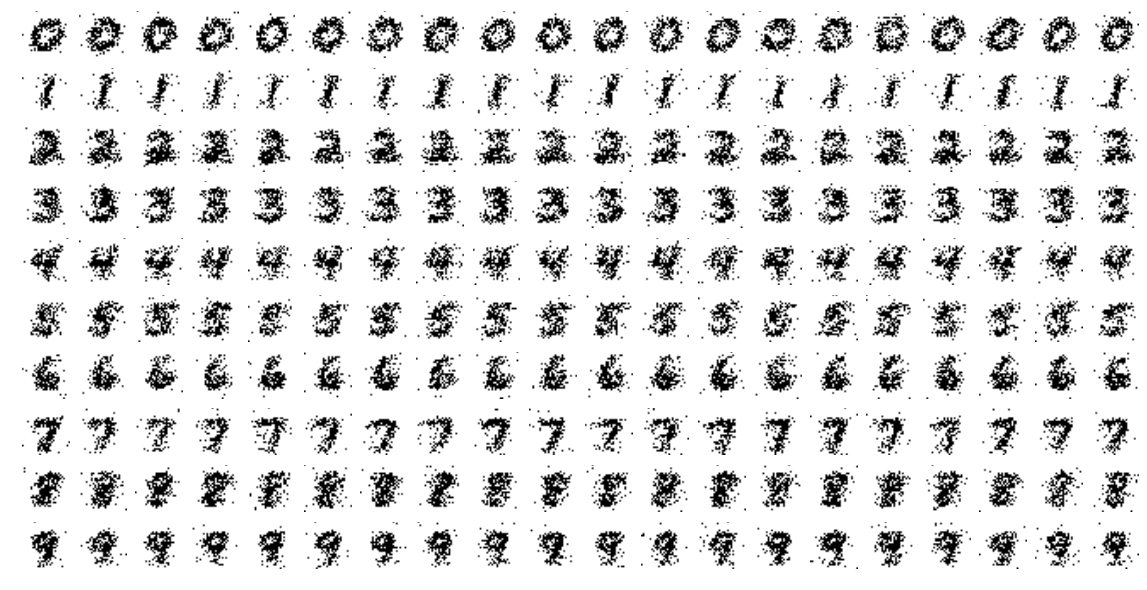

In [79]:
def P10(num_examples):

### STUDENT START ###

    # Binarize data
    binarized_train_data = np.ceil(mini_train_data)
    binarized_dev_data = np.ceil(dev_data)
    
    # Fit model
    binaryNB = BernoulliNB()
    binaryNB.fit(binarized_train_data, mini_train_labels)
    print 'BernoulliNB accuracy: %3.2f' %binaryNB.score(binarized_dev_data, dev_labels)
    
    # Get log probabilities for each feature (and exponentiate)
    probs = np.exp(binaryNB.feature_log_prob_)
    
    # Render examples using the probability
    plt.figure(figsize=(20, 10))
    for digit in range (0,10):
        for example in range(0,20):
            rand = np.random.rand(784)
            # Determine what pixels to turn on
            digit_bool = np.array(rand <= probs[digit], dtype=int).reshape(28,-1)

            plt.subplot(10,20,(digit * 20) + example + 1)
            plt.imshow(digit_bool, cmap=plt.cm.binary)
            plt.axis('off')
### STUDENT END ###

P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train BernoulliNB model with a reasonable alpha value. Get the maximum posterior probability for each prediction and fill in the corresponding values for "correct" and "total" so you can display the accuracy for each bucket. Don't make the buckets cumulative -- that is, each maximum posterior should correspond to a single bucket.

How would you characterize the calibration for the Naive Bayes model?

[3 pts]

In [80]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # Create the model
    binarized_train_data = np.ceil(mini_train_data)
    binarized_dev_data = np.ceil(dev_data)
    
    binaryNB = BernoulliNB(alpha = 0.0001)
    binaryNB.fit(binarized_train_data, mini_train_labels)
    print 'Overall BernoulliNB accuracy: %3.2f' %binaryNB.score(binarized_dev_data, dev_labels)
    predicted_labels = binaryNB.predict(binarized_dev_data)
    
    # Get the posterior probabilities
    posterior = binaryNB.predict_proba(binarized_dev_data)
    for x in range(0, posterior.shape[0]):
        #max probability
        post_max = np.max(posterior[x])
        #correctness
        post_cor = float(predicted_labels[x] == dev_labels[x])
        
        # Now we can "file" our results into correct and total
        # 1 is a special case since we need to file in the last bucket
        if post_max == 1:
            total[len(buckets) - 1] += 1
            correct[len(buckets) - 1] += post_cor
        else:
            # Otherwise, try each bucket
            for y in range(len(buckets) - 1):
                if buckets[y] <= post_max < buckets[y + 1]:
                    total[y] += 1
                    correct[y] += post_cor
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

Overall BernoulliNB accuracy: 0.81
p(pred) <= 0.5000000000000    total =  34    accuracy = 0.471
p(pred) <= 0.9000000000000    total =  59    accuracy = 0.407
p(pred) <= 0.9990000000000    total =  59    accuracy = 0.525
p(pred) <= 0.9999900000000    total =  59    accuracy = 0.593
p(pred) <= 0.9999999000000    total =  41    accuracy = 0.512
p(pred) <= 0.9999999990000    total =  50    accuracy = 0.700
p(pred) <= 0.9999999999900    total =  40    accuracy = 0.775
p(pred) <= 0.9999999999999    total =  17    accuracy = 0.706
p(pred) <= 1.0000000000000    total = 640    accuracy = 0.950


ANSWER: We see that when the p(pred) is 90%, we have 41% accuracy. This rules out status as a "strong" classifier. We do, however, see that for p(pred) > 90, increasing the p(pred) increases our accuracy in most cases (note that 0.9999999999999 has a small sample size). This leads me to conclude we have a weakly calibrated classifier. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

For training on the mini training set,
- \> 84% accuracy: 2 pt
- \> 86% accuracy: 4 pts

In [ ]:
def P12():

### STUDENT START ###
    # Create the model
    #binarized_train_data = np.ceil(mini_train_data)
    #binarized_dev_data = np.ceil(dev_data)
    #print mini_train_data.shape
    
    #binaryNB = BernoulliNB(alpha = 0.1)
    #binaryNB.fit(binarized_train_data, mini_train_labels)
    #print 'Original BernoulliNB accuracy: %3.3f' %binaryNB.score(binarized_dev_data, dev_labels)

    #def add_total_flags(data):
    #    totals = np.sum(data, axis=1, dtype='int64')
    #    tally_matrix = []
    #    for tot in totals:
    #        tally = np.array(([1] * tot) + ([0] * (300 - tot)))
    #        tally_matrix.append(tally)
    #    tallied_data = np.append(data, tally_matrix, axis=1)
    #    return tallied_data
    
    #tallied_train = add_total_flags(mini_train_data)
    #tallied_dev = add_total_flags(binarized_dev_data)

    #binaryNB = BernoulliNB(alpha = 35)
    #binaryNB.fit(tallied_train, mini_train_labels)
    #print 'Updated BernoulliNB accuracy: %3.3f' %binaryNB.score(tallied_dev, dev_labels)

    x = 0
    while x < 0.86:
    # Guassian NB 
        mini_train_noise = mini_train_data + np.random.normal(.5, .25, mini_train_data.shape)
        dev_noise = dev_data + np.random.normal(.5, .25, dev_data.shape)
        gaussNBnorm = GaussianNB()
        gaussNBnorm.fit(mini_train_noise, mini_train_labels)
        #print 'Original accuracy: %3.3f' %gaussNBnorm.score(dev_noise, dev_labels)

        # Function to append row and col totals
        def row_col_sums(data):
            data_shaped = np.reshape(data, (len(data), 28,-1))
            sumsx = np.sum(data_shaped, axis = 2)/748
            sumsy = np.sum(data_shaped, axis = 1)/748
            updated_data = np.append((np.append(data, sumsx, axis=1)), sumsy, axis=1)
            return updated_data

        train_rc_sums = row_col_sums(mini_train_noise)
        dev_rc_sums = row_col_sums(dev_noise)

        gaussNBnorm = GaussianNB()
        gaussNBnorm.fit(train_rc_sums, mini_train_labels)
        x = gaussNBnorm.score(dev_rc_sums, dev_labels)

    gaussNBnorm.fit(mini_train_noise, mini_train_labels)
    print 'Original accuracy: %3.3f' %gaussNBnorm.score(dev_noise, dev_labels)
    
    gaussNBnorm.fit(train_rc_sums, mini_train_labels)
    print 'Updated accuracy: %3.3f' %gaussNBnorm.score(dev_rc_sums, dev_labels)

    
### STUDENT END ###

P12()